## Plot the magnetic data

In [1]:
import pandas as pd

In [2]:
import pandas as pd
triplite_data = pd.read_csv("triplite_fm_energies.csv").set_index("label").sort_values("energy_fu")
df = pd.read_csv("summary_data.csv", index_col='label').sort_values('e_vasp_ref')

uuid_mask = df.head(10).groupby(lambda x: x).last()['relaxed']
mask = df.relaxed.apply(lambda x: x in uuid_mask.values)
selected = df[mask][['energy_fu', 'relaxed', 'volume_fu', 'e_vasp_ref']]
# Hack 
selected.loc['mp-943492', 'relaxed'] = "3192ee81-604d-4653-a5f2-a4bf70501a75"  # Swap for the ground state of Tavorite
# Add the triplite phases
to_join = triplite_data.head(3)[['structure', 'energy_fu']]
to_join = to_join.rename(columns={'structure': 'relaxed'})
selected = selected.append(to_join)
selected = selected.rename(index={
    'LiFeSO4F triplite-ordered-5': 'LiFeSO4F-triplite_5',
    'LiFeSO4F triplite-ordered-0': 'LiFeSO4F-triplite_0',
    'LiFeSO4F triplite-ordered-14': 'LiFeSO4F-triplite_14',
    'mp-943492': 'LiFeSO4F-tavorite(MP)'

})
selected

,energy_fu,relaxed,volume_fu,e_vasp_ref
label,,,,
2LiFeSO4F-200804-034722-678938,-48.272479,b60e1513-1c6f-4ce6-af79-3981536dd19e,103.915740,0.000000
4LiFeSO4F-200804-074522-8932e9,-48.258447,3ba0f21b-4e91-4958-aad1-a4fec99d8495,104.299580,0.014032
4LiFeSO4F-200804-070941-02f116,-48.234094,f38b83a3-4e36-4c79-adbf-b72992c238f2,97.476738,0.038385
4LiFeSO4F-200804-063655-9d6304,-48.233147,60216625-0d7c-435c-b7a4-3e36802063e1,94.981354,0.039332
4LiFeSO4F-200804-055002-9fc062,-48.220242,2064057b-cc5b-4d43-be45-7d8204feb94c,93.285104,0.052237
2LiFeSO4F-200804-051350-99d823,-48.212473,fa4df8ba-4a3f-44a5-9820-a03f0c836a25,95.904383,0.060005
mp-1222389,-48.212231,2093e561-0802-418b-b143-271992ad5f83,95.373852,0.060248
LiFeSO4F-tavorite(MP),-48.209214,3192ee81-604d-4653-a5f2-a4bf70501a75,95.743087,0.063265
LiFeSO4F-triplite_5,-48.212786,ae207049-f7b7-4a53-801a-0d45b4240464,NaN,NaN


In [3]:
magnetic_df = pd.read_csv("magnetic_test_results.csv")

In [4]:
selected

,energy_fu,relaxed,volume_fu,e_vasp_ref
label,,,,
2LiFeSO4F-200804-034722-678938,-48.272479,b60e1513-1c6f-4ce6-af79-3981536dd19e,103.915740,0.000000
4LiFeSO4F-200804-074522-8932e9,-48.258447,3ba0f21b-4e91-4958-aad1-a4fec99d8495,104.299580,0.014032
4LiFeSO4F-200804-070941-02f116,-48.234094,f38b83a3-4e36-4c79-adbf-b72992c238f2,97.476738,0.038385
4LiFeSO4F-200804-063655-9d6304,-48.233147,60216625-0d7c-435c-b7a4-3e36802063e1,94.981354,0.039332
4LiFeSO4F-200804-055002-9fc062,-48.220242,2064057b-cc5b-4d43-be45-7d8204feb94c,93.285104,0.052237
2LiFeSO4F-200804-051350-99d823,-48.212473,fa4df8ba-4a3f-44a5-9820-a03f0c836a25,95.904383,0.060005
mp-1222389,-48.212231,2093e561-0802-418b-b143-271992ad5f83,95.373852,0.060248
LiFeSO4F-tavorite(MP),-48.209214,3192ee81-604d-4653-a5f2-a4bf70501a75,95.743087,0.063265
LiFeSO4F-triplite_5,-48.212786,ae207049-f7b7-4a53-801a-0d45b4240464,NaN,NaN


In [5]:
magnetic_df

,Unnamed: 0,energy,origin,config_id,relaxation,magnetisation,input_structure,output_structure,total_magnetisation,label
0,6,-48.274155,afm,6,8c650b2b-0b2e-4f16-86c5-22cae1db83eb,[0.0],abbb0a5b-1a3a-470d-b329-acfefd5ac657,fe405c7d-df83-434f-9248-3eca4e8cb06b,0.000000e+00,2LiFeSO4F-200804-034722-678938
1,1,-48.271421,afm,1,4057b7ea-be3d-479e-80a2-6df7df85c492,[1e-07],3f699959-d89a-4e21-b7f9-27817ed69bff,0a0f90f4-f895-4020-99d0-d0f6413be1c2,2.500000e-08,4LiFeSO4F-200804-070941-02f116
2,3,-48.258405,afm,3,fb568ecd-f281-4649-af69-50528a9122c8,[0.0],65a07704-7c49-49b9-88fd-8de3740a8118,f14ed64a-8eb9-4f31-a548-aa26acc2be00,0.000000e+00,4LiFeSO4F-200804-074522-8932e9
3,3,-48.245156,afm,3,548c9d92-6fba-40b8-b834-3ba2e34d7086,[1.72e-05],f3ef65a2-a051-4c04-a67b-7631f83caacb,8baa632f-4568-4014-a864-c1b39d2c599c,4.300000e-06,LiFeSO4F-tavorite(MP)
4,2,-48.236326,afm,2,83d8054c-1898-4b12-b23e-7329b47a9369,[0.0],7994ff79-f4f4-427e-ba91-35ce0a5fd01c,35db2d8e-1ec0-46ce-872e-92e665fa23d2,0.000000e+00,4LiFeSO4F-200804-063655-9d6304
5,1,-48.229121,afm,1,96064a2c-f587-4618-b7aa-1edcf5380562,[0.0],df6bc47b-e617-4686-bd10-1a45893e88b4,2de9309f-3478-4688-b01e-3acbdb1b1971,0.000000e+00,4LiFeSO4F-200804-055002-9fc062
6,2,-48.223945,afm,2,521e8075-520e-4c6b-a16b-9ef5a8c2b11a,[0.0],c4b5bc68-7dc5-432f-89d0-cdd4641f29a5,cd4163d4-ebac-45a1-bd3d-3901d946ac85,0.000000e+00,2LiFeSO4F-200804-051350-99d823
7,10,-48.223611,afm,10,4e4e364d-2416-4207-a9cb-898bc55f60f7,[-4e-07],76ca30c7-f827-4597-b4f2-91829fa8e519,3fb54bc3-9208-42e7-9266-d8afe963767f,-1.000000e-07,mp-1222389
8,3,-48.214732,afm,3,432c3d71-748e-4324-b1df-1169cc7936ef,[-1e-07],8b00aa20-296f-4f44-af6a-d4c766c20f64,1f8b349b-db63-4520-8397-6737e147133d,-2.500000e-08,LiFeSO4F-triplite_5
9,1,-48.203156,afm,1,3a815627-9578-4f37-af22-19578d66a80a,[0.0],51fdff23-4913-40a0-a766-597b18f3f77d,cd71b3a4-5304-4c93-bf4c-3cf8e58ca366,0.000000e+00,LiFeSO4F-triplite_0


In [6]:
naming = {
    '8938': 'A',
    'f116': 'C',
    '32e9': 'B',
    'tavorite(MP)': 'Ta-I',
    '6304': 'D',
    'c062': 'E',
    'd823': 'F',
    '2389': 'Ta-II',
    'triplite_5': 'Tr-I',
    'triplite_0': 'Tr-II',
    'triplite_14': 'Tr-III'
}
def get_alias(label):
    for key, value in naming.items():
        if label.endswith(key):
            return value
    return None

## Get the extra tavorite energy

In [7]:
import matplotlib.pyplot as plt
import matplotlib

In [8]:
#plt.style.use("/home/bonan/.config/matplotlib/stylelib/pulication.mplstyle")
plt.rcParams['legend.fontsize'] = 9

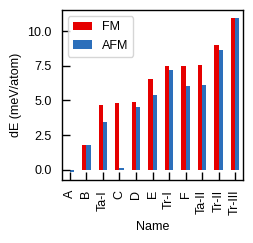

In [9]:
plot_df = magnetic_df.set_index('label')
plot_df['energy_fu'] = selected['energy_fu']

# insert revised energy for tavorite
plot_df.loc['LiFeSO4F-tavorite(MP)', 'energy_fu'] = -48.235022

plot_df['short_label'] = [x.split('-')[-1] for x in plot_df.index]
plot_df['energy_afm'] = (plot_df['energy'] - plot_df['energy_fu'].min()) / 8 * 1000
plot_df['energy_fm'] = (plot_df['energy_fu'] - plot_df['energy_fu'].min()) / 8 * 1000
plot_df.rename(columns={'energy_fm': 'FM', 'energy_afm': 'AFM'}, inplace=True)
plot_df.sort_values('energy_fu', inplace=True)
plot_df['alias'] = [get_alias(x) for x in plot_df.index]
fig, ax = plt.subplots(1, 1, figsize=(2.5, 2.5), dpi=100)
plot_df.plot.bar(x='alias', y=["FM", "AFM"], color=['xkcd:red', 'xkcd:medium blue'], ax=ax)
plt.ylabel("dE (meV/atom)")
plt.xlabel('Name')
plt.tight_layout()
plt.savefig("paper_assets/energt_diff_fm_afm.svg")
plt.savefig("paper_assets/energt_diff_fm_afm.png")
plot_df.to_csv("paper_assets/magnet_plot_data.csv")

In [10]:
plot_df['dE'] = plot_df['FM'] - plot_df['AFM']

In [11]:
plot_df['dE_eV']  = plot_df['dE'] * 1e-3

In [13]:
plot_df[['alias', 'dE_eV', 'FM']]

,alias,dE_eV,FM
label,,,
2LiFeSO4F-200804-034722-678938,A,0.000210,0.000000
4LiFeSO4F-200804-074522-8932e9,B,-0.000005,1.753939
LiFeSO4F-tavorite(MP),Ta-I,0.001267,4.682066
4LiFeSO4F-200804-070941-02f116,C,0.004666,4.798097
4LiFeSO4F-200804-063655-9d6304,D,0.000397,4.916443
4LiFeSO4F-200804-055002-9fc062,E,0.001110,6.529602
LiFeSO4F-triplite_5,Tr-I,0.000243,7.461587
2LiFeSO4F-200804-051350-99d823,F,0.001434,7.500682
mp-1222389,Ta-II,0.001422,7.530958
